In [740]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

#### setup DBs connection

In [741]:
#Setup Connection with the 1st DB
conn = sqlite3.connect('databases/deliveroo.db')
# Attach the other two databases
conn.execute("ATTACH DATABASE 'databases/takeaway.db' AS tw;")
conn.execute("ATTACH DATABASE 'databases/ubereats.db' AS ue;")

# Verify attached databases
databases = conn.execute("PRAGMA database_list;").fetchall()
print("Attached Databases:")
for db in databases:
    print(db)

Attached Databases:
(0, 'main', 'c:\\Users\\Rik\\Desktop\\delivery-market-analysis-with-SQL\\databases\\deliveroo.db')
(2, 'tw', 'c:\\Users\\Rik\\Desktop\\delivery-market-analysis-with-SQL\\databases\\takeaway.db')
(3, 'ue', 'c:\\Users\\Rik\\Desktop\\delivery-market-analysis-with-SQL\\databases\\ubereats.db')


#### How do delivery fees vary across platforms and locations?

In [742]:
## takeaway

try:
    takeAwy ="""SELECT
                        tw.locations.postalCode,
                        ROUND(AVG(tw.restaurants.deliveryFee),2) as delivery_fee
                    FROM
                        tw.restaurants
                    INNER JOIN
                        tw.locations_to_restaurants
                    ON
                        tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
                    INNER JOIN
                        tw.locations
                    ON
                        tw.locations_to_restaurants.location_id = tw.locations.ID
                    WHERE
                        tw.locations.postalCode IS NOT NULL
                        AND tw.restaurants.deliveryFee IS NOT NULL
                    GROUP BY
                        tw.locations.postalCode
                    ORDER BY
                delivery_fee DESC;"""
    takeAwy_results = conn.execute(takeAwy).fetchall()
    for row in takeAwy_results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)

(3791, 7.13)
(3793, 6.0)
(3061, 5.86)
(9688, 5.6)
(3792, 5.58)
(3717, 5.4)
(3790, 5.18)
(1761, 5.18)
(1750, 5.11)
(1755, 4.9)
(1741, 4.85)
(3640, 4.76)
(3806, 4.74)
(1671, 4.71)
(3803, 4.69)
(1742, 4.52)
(3960, 4.46)
(3798, 4.46)
(9690, 4.44)
(9681, 4.43)
(1602, 4.43)
(9031, 4.4)
(9820, 4.36)
(9051, 4.35)
(9070, 4.3)
(9030, 4.3)
(1701, 4.3)
(3891, 4.29)
(9032, 4.23)
(9040, 4.22)
(1760, 4.15)
(1600, 4.14)
(9050, 4.13)
(2030, 4.06)
(9000, 4.05)
(8570, 4.03)
(8511, 4.03)
(8710, 4.02)
(3680, 4.02)
(3440, 4.02)
(9881, 4.0)
(9680, 4.0)
(8851, 4.0)
(8470, 3.99)
(1700, 3.97)
(8780, 3.95)
(3890, 3.95)
(9041, 3.93)
(1620, 3.93)
(9052, 3.9)
(8810, 3.89)
(3404, 3.88)
(2050, 3.85)
(8340, 3.83)
(3870, 3.82)
(8850, 3.79)
(8791, 3.79)
(3545, 3.79)
(3080, 3.76)
(8020, 3.74)
(9970, 3.73)
(9968, 3.72)
(1703, 3.72)
(2020, 3.68)
(2000, 3.68)
(9961, 3.67)
(3090, 3.66)
(1670, 3.66)
(8531, 3.64)
(9971, 3.63)
(1560, 3.63)
(3040, 3.62)
(2060, 3.62)
(1740, 3.61)
(1140, 3.6)
(8200, 3.58)
(3078, 3.58)
(2018, 3.57)

In [743]:
## Deliveroo
try:
    deliveroo ="""SELECT
                    restaurants.postal_code,
                    ROUND(AVG(restaurants.delivery_fee),2) AS delivery_fee
    
                FROM
                    restaurants
                WHERE
                    restaurants.delivery_fee IS NOT NULL
                    AND restaurants.postal_code IS NOT NULL
                GROUP BY
                    restaurants.postal_code
                ORDER BY
                    delivery_fee ASC;"""
    deliveroo_results = conn.execute(deliveroo).fetchall()
    for row in deliveroo_results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)

('2050', 1.0)
('1020', 4.41)
('8501', 4.59)
('1800', 4.68)
('9300', 4.8)
('1150', 4.85)
('8310', 4.89)
('2140', 4.92)
('3800', 4.92)
('1090', 4.93)
('2018', 4.93)
('2600', 4.93)
('8500', 4.94)
('3500', 4.96)
('8000', 4.96)
('9000', 4.97)
('2000', 4.98)
('3000', 4.98)
('', 4.99)
('1000', 4.99)
('1030', 4.99)
('1040', 4.99)
('1060', 4.99)
('1080', 4.99)
('1081', 4.99)
('1082', 4.99)
('1083', 4.99)
('1120', 4.99)
('1130', 4.99)
('1140', 4.99)
('1160', 4.99)
('1180', 4.99)
('1190', 4.99)
('1200', 4.99)
('1210', 4.99)
('1330', 4.99)
('1410', 4.99)
('1600', 4.99)
('1620', 4.99)
('1700', 4.99)
('1702', 4.99)
('1780', 4.99)
('1830', 4.99)
('1831', 4.99)
('1850', 4.99)
('1853', 4.99)
('1930', 4.99)
('1932', 4.99)
('1950', 4.99)
('1970', 4.99)
('2020', 4.99)
('2030', 4.99)
('2060', 4.99)
('2100', 4.99)
('2110', 4.99)
('2150', 4.99)
('2160', 4.99)
('2170', 4.99)
('2180', 4.99)
('2300', 4.99)
('2360', 4.99)
('2610', 4.99)
('2640', 4.99)
('2660', 4.99)
('2800', 4.99)
('2812', 4.99)
('2900', 4.99)
(

#### Which restaurants have the best price-to-rating ratio?

In [744]:

try:
    deliveroo_query = """
    SELECT  
        restaurants.uname,
        ROUND(AVG(menu_items.price_float), 2) AS avg_price,
        restaurants.rating,
        CAST(REPLACE(REPLACE(REPLACE(restaurants.rating_number, '+', ''), 'k', '000'), 'M', '000000') AS INTEGER) AS rating_number,
        ROUND(
            (restaurants.rating * CAST(REPLACE(REPLACE(REPLACE(restaurants.rating_number, '+', ''), 'k', '000'), 'M', '000000') AS INTEGER)) / 
            (CAST(REPLACE(REPLACE(REPLACE(restaurants.rating_number, '+', ''), 'k', '000'), 'M', '000000') AS INTEGER) + 10), 2
        ) AS weighted_rating,
        ROUND(
            ((restaurants.rating * CAST(REPLACE(REPLACE(REPLACE(restaurants.rating_number, '+', ''), 'k', '000'), 'M', '000000') AS INTEGER)) / 
            (CAST(REPLACE(REPLACE(REPLACE(restaurants.rating_number, '+', ''), 'k', '000'), 'M', '000000') AS INTEGER) + 10)) / AVG(menu_items.price_float), 2
        ) AS price_to_weighted_rating_ratio,
        CASE 
            WHEN AVG(menu_items.price_float) < 10 THEN 'Average Price lower then 10€'
            WHEN AVG(menu_items.price_float) BETWEEN 10 AND 20 THEN 'Average Price between 10 and 20€'
            WHEN AVG(menu_items.price_float) BETWEEN 20 AND 30 THEN 'Average Price between 20 and 30€'
            ELSE 'Average Price higher then 30€'
        END AS price_bucket
    FROM 
        menu_items
    INNER JOIN 
        restaurants
    ON 
        menu_items.restaurant_id = restaurants.id
    WHERE 
        menu_items.price_float IS NOT NULL 
        AND menu_items.price_float > 0
        AND restaurants.rating IS NOT NULL
        AND restaurants.rating > 0
        AND restaurants.rating_number IS NOT NULL
        AND restaurants.rating_number > 0
    GROUP BY 
        menu_items.restaurant_id, restaurants.name, restaurants.rating, restaurants.rating_number
    HAVING
        price_to_weighted_rating_ratio IS NOT NULL
        AND avg_price IS NOT NULL
    ORDER BY
        price_to_weighted_rating_ratio DESC;"""
    
    # Use pd.read_sql() to execute the query and fetch results into a DataFrame
    deliveroo_df = pd.read_sql(deliveroo_query, conn)
    
    # Display the DataFrame
    print(deliveroo_df)

except sqlite3.OperationalError as e:
    print("Error:", e)

except Exception as ex:
    print("An error occurred:", ex)





                          uname  avg_price  rating  rating_number  \
0            dunkin-donuts-meir       1.43     4.5             98   
1              dunkin-antwerpen       1.50     4.3            500   
2           dunkin-donuts-ghent       1.51     4.3            500   
3         dunkin-donuts-hasselt       1.51     4.3            274   
4     dunkin-steenstraat-brugge       1.47     4.2            145   
...                         ...        ...     ...            ...   
1679                lobster-pot      35.96     4.1             10   
1680                   liq-gent       7.49     1.2              6   
1681    neuhaus-woluwe-shopping      32.31     5.0              6   
1682             neuhaus-brugge      35.43     4.6             10   
1683            neuhaus-hasselt      44.31     4.2             12   

      weighted_rating  price_to_weighted_rating_ratio  \
0                4.08                            2.86   
1                4.22                            2.80   


In [745]:
deliveroo_df.head(10)

,uname,avg_price,rating,rating_number,weighted_rating,price_to_weighted_rating_ratio,price_bucket
0,dunkin-donuts-meir,1.43,4.5,98,4.08,2.86,Average Price lower then 10€
1,dunkin-antwerpen,1.50,4.3,500,4.22,2.80,Average Price lower then 10€
2,dunkin-donuts-ghent,1.51,4.3,500,4.22,2.79,Average Price lower then 10€
3,dunkin-donuts-hasselt,1.51,4.3,274,4.15,2.74,Average Price lower then 10€
4,dunkin-steenstraat-brugge,1.47,4.2,145,3.93,2.68,Average Price lower then 10€
5,carrefour-express-voskenslaan,1.42,3.9,150,3.66,2.57,Average Price lower then 10€
6,dunkin-donuts-brussels-docks,1.51,4.1,99,3.72,2.46,Average Price lower then 10€
7,french-tacos,2.23,4.1,500,4.02,1.80,Average Price lower then 10€
8,frituur-marcel,2.31,4.2,202,4.00,1.73,Average Price lower then 10€
9,frituur-dageraad,2.49,4.3,391,4.19,1.68,Average Price lower then 10€


In [746]:
deliveroo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   uname                           1684 non-null   object 
 1   avg_price                       1684 non-null   float64
 2   rating                          1684 non-null   float64
 3   rating_number                   1684 non-null   int64  
 4   weighted_rating                 1684 non-null   float64
 5   price_to_weighted_rating_ratio  1684 non-null   float64
 6   price_bucket                    1684 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 92.2+ KB


In [747]:
# Normalize the price_to_weighted_rating_ratio within each price bucket
deliveroo_df['normalized_price_to_weighted_rating_ratio'] = deliveroo_df.groupby('price_bucket')['price_to_weighted_rating_ratio'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)


In [748]:
deliveroo_df.head(20)

,uname,avg_price,rating,rating_number,weighted_rating,price_to_weighted_rating_ratio,price_bucket,normalized_price_to_weighted_rating_ratio
0,dunkin-donuts-meir,1.43,4.5,98,4.08,2.86,Average Price lower then 10€,1.000000
1,dunkin-antwerpen,1.50,4.3,500,4.22,2.80,Average Price lower then 10€,0.978571
2,dunkin-donuts-ghent,1.51,4.3,500,4.22,2.79,Average Price lower then 10€,0.975000
3,dunkin-donuts-hasselt,1.51,4.3,274,4.15,2.74,Average Price lower then 10€,0.957143
4,dunkin-steenstraat-brugge,1.47,4.2,145,3.93,2.68,Average Price lower then 10€,0.935714
5,carrefour-express-voskenslaan,1.42,3.9,150,3.66,2.57,Average Price lower then 10€,0.896429
6,dunkin-donuts-brussels-docks,1.51,4.1,99,3.72,2.46,Average Price lower then 10€,0.857143
7,french-tacos,2.23,4.1,500,4.02,1.80,Average Price lower then 10€,0.621429
8,frituur-marcel,2.31,4.2,202,4.00,1.73,Average Price lower then 10€,0.596429
9,frituur-dageraad,2.49,4.3,391,4.19,1.68,Average Price lower then 10€,0.578571


C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\2488898010.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\2488898010.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\2488898010.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\2488898010.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(


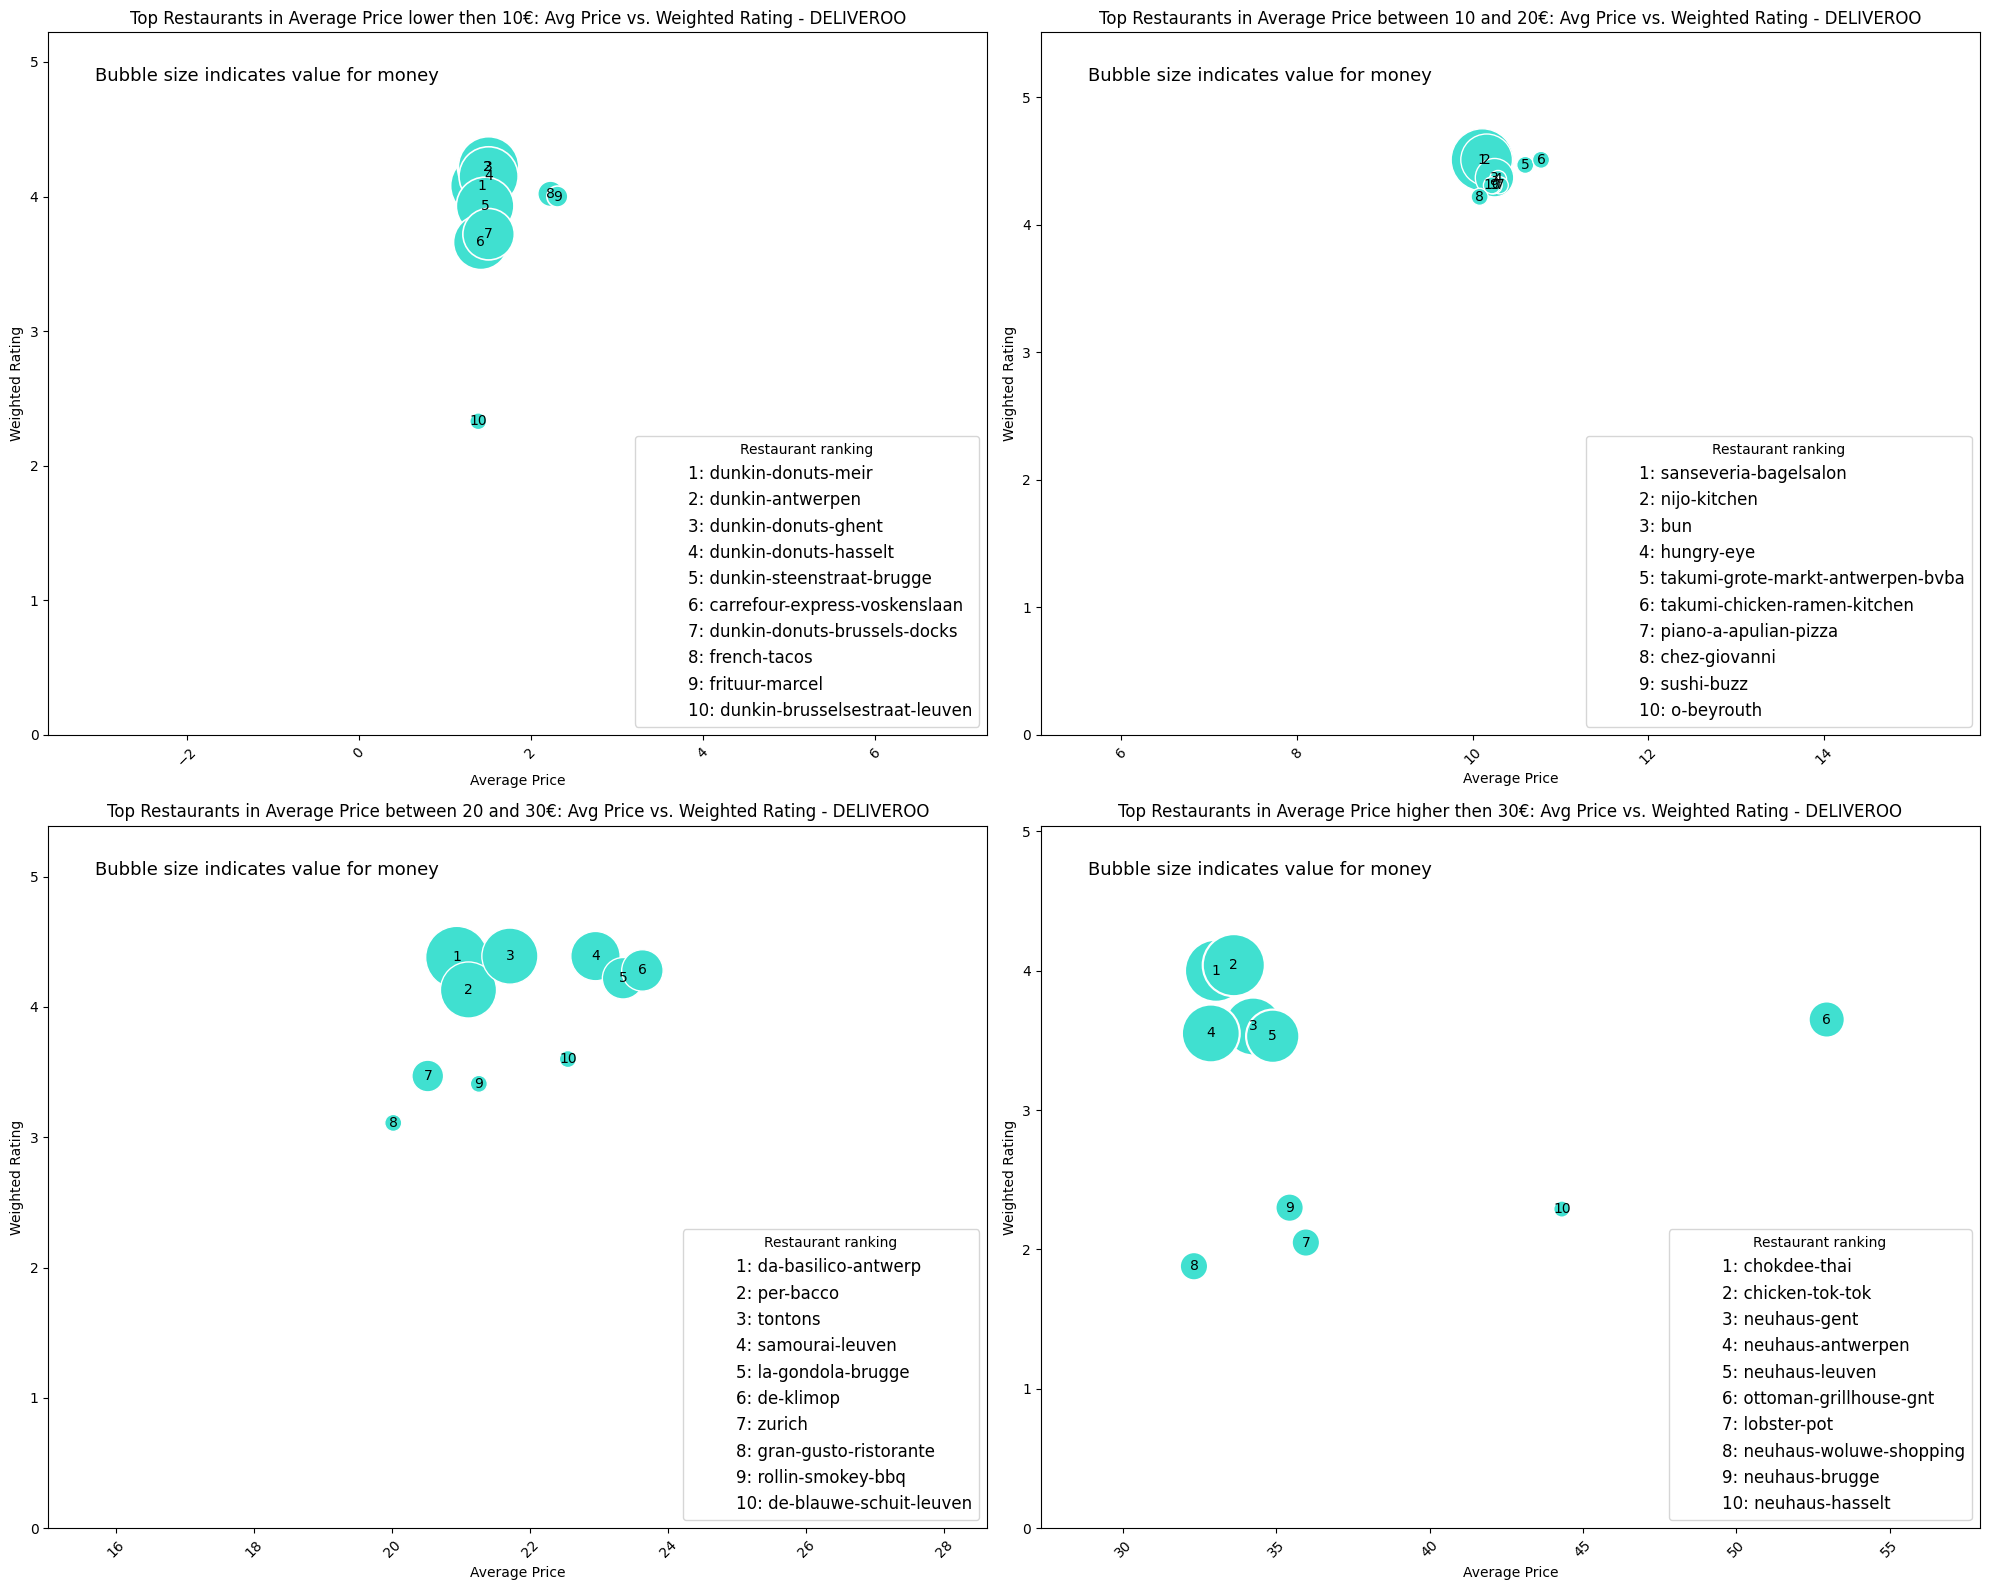

In [749]:

# Get the top 10 restaurants for each bucket
top_10_per_bucket = deliveroo_df.sort_values(by='price_to_weighted_rating_ratio', ascending=False).groupby('price_bucket').head(10)

# Create a turquoise color palette
palette = sns.color_palette(["#40E0D0", "#48D1CC", "#00CED1", "#20B2AA", "#5F9EA0"], n_colors=len(top_10_per_bucket['price_bucket'].unique()))

# Set up subplots for four charts
unique_buckets = top_10_per_bucket['price_bucket'].unique()
num_buckets = len(unique_buckets)
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # Adjust size as needed

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each bucket and plot a chart
for i, bucket in enumerate(unique_buckets):
    ax = axes[i]
    bucket_data = top_10_per_bucket[top_10_per_bucket['price_bucket'] == bucket]

    # Plot the scatter plot for each bucket
    sns.scatterplot(
        data=bucket_data,
        x='avg_price',
        y='weighted_rating',
        size='normalized_price_to_weighted_rating_ratio',
        hue='price_bucket',
        sizes=(150, 2000),  # Further increased the lower limit of bubble sizes
        palette=palette,
        ax=ax,
        legend=None  # Drop the legend initially
    )

    # Number the bubbles from 1 to 10 and add them as labels
    for j, row in enumerate(bucket_data.iterrows()):
        _, row = row
        ax.text(
            row['avg_price'],
            row['weighted_rating'],
            str(j + 1),  # Number the bubbles starting from 1
            fontsize=10,  # Slightly larger text for better readability
            ha='center',
            va='center',
            color='black'  # Black text works well with turquoise shades
        )

    # Add a note about bubble size representing review count
    ax.text(
        x=0.05,  # Adjust the x-position as needed
        y=0.95,  # Adjust the y-position as needed
        s='Bubble size indicates value for money',
        color='black',
        fontsize=13,
        ha='left',
        va='top',
        transform=ax.transAxes  # Use axes coordinates for placement
    )

    # Create a custom legend for each subplot
    handles = []
    labels = []
    for j, row in enumerate(bucket_data.iterrows()):
        _, row = row
        # Create a placeholder line for the legend without a colored marker
        handle = plt.Line2D([0], [0], color='black', lw=0, marker=None, markersize=0)
        handles.append(handle)
        labels.append(f"{j + 1}: {row['uname']}")  # Label with number and restaurant name

    ax.legend(
        handles=handles, 
        labels=labels, 
        loc='lower right', 
        title=f'Restaurant ranking',
        prop={'size': 12}  # Adjust the size of the legend text
    )

    # Set title and labels for each subplot
    ax.set_title(f'Top Restaurants in {bucket}: Avg Price vs. Weighted Rating - DELIVEROO')
    ax.set_xlabel('Average Price')
    ax.set_ylabel('Weighted Rating')

    # Rotate tick labels for better visibility
    ax.tick_params(axis='x', labelrotation=45)

    # Adjust axis limits dynamically based on the range of avg_price
    x_min = bucket_data['avg_price'].min() - 5  # Add a buffer to the lower limit
    x_max = bucket_data['avg_price'].max() + 5  # Add a buffer to the upper limit
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, bucket_data['weighted_rating'].max() + 1)  # Adjust y-axis limit for better space

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



In [750]:
try:
    takeAwy_query = """
    SELECT
        tw.restaurants.name,
        ROUND(AVG(tw.menuItems.price_float), 2) AS avg_price,
        tw.restaurants.ratings,
        tw.restaurants.ratingsNumber,
        ROUND(
            (tw.restaurants.ratings * tw.restaurants.ratingsNumber) / (tw.restaurants.ratingsNumber + 10), 2
        ) AS weighted_rating,
        ROUND(
            ((tw.restaurants.ratings * tw.restaurants.ratingsNumber) / (tw.restaurants.ratingsNumber + 10)) /
            AVG(tw.menuItems.price_float), 2
        ) AS price_to_weighted_rating_ratio,
        CASE 
            WHEN AVG(tw.menuItems.price_float) < 10 THEN 'Average Price lower then 10€'
            WHEN AVG(tw.menuItems.price_float) BETWEEN 10 AND 20 THEN 'Average Price between 10 and 20€'
            WHEN AVG(tw.menuItems.price_float) BETWEEN 20 AND 30 THEN 'Average Price between 20 and 30€'
            ELSE 'Average Price higher then 30€'
        END AS price_bucket
    FROM
        tw.menuItems
    INNER JOIN
        tw.restaurants
    ON 
        tw.menuItems.primarySlug = tw.restaurants.primarySlug
    WHERE
        tw.menuItems.price_float IS NOT NULL 
        AND tw.menuItems.price_float > 0 
        AND tw.restaurants.ratings IS NOT NULL
        AND tw.restaurants.ratings > 0
        AND tw.restaurants.ratingsNumber IS NOT NULL
        AND tw.restaurants.ratingsNumber > 0
    GROUP BY
        tw.menuItems.primarySlug,
        tw.restaurants.name,
        tw.restaurants.ratings,
        tw.restaurants.ratingsNumber
    HAVING
        price_to_weighted_rating_ratio IS NOT NULL
        AND avg_price IS NOT NULL  
    ORDER BY
        price_to_weighted_rating_ratio DESC;
    """
    
    # Use pd.read_sql() to fetch the data and create a DataFrame
    takeAwy_df = pd.read_sql(takeAwy_query, conn)
    
    # Display the DataFrame
    print(takeAwy_df)

except sqlite3.OperationalError as e:
    print("Error:", e)

except Exception as ex:
    print("An error occurred:", ex)



                     name  avg_price  ratings  ratingsNumber  weighted_rating  \
0           El Bocadillos       2.00      4.2            307             4.07   
1          Frituur Amigos       2.41      4.3           1172             4.26   
2           Frituur 4 You       2.69      4.7            220             4.50   
3         Frituur Permeke       2.90      4.6            985             4.55   
4         La Friterie Red       2.58      4.1            536             4.02   
...                   ...        ...      ...            ...              ...   
3619    Le Pain Quotidien       9.38      2.0              3             0.00   
3620               Minori       7.18      4.0              3             0.00   
3621          Shaka Sushi       6.26      3.0              3             0.00   
3622           Snack Maya       9.11      3.0              4             0.00   
3623  Snack de la Famille       6.23      3.0              4             0.00   

      price_to_weighted_rat

In [751]:
takeAwy_df.head(10)

,name,avg_price,ratings,ratingsNumber,weighted_rating,price_to_weighted_rating_ratio,price_bucket
0,El Bocadillos,2.00,4.2,307,4.07,2.03,Average Price lower then 10€
1,Frituur Amigos,2.41,4.3,1172,4.26,1.77,Average Price lower then 10€
2,Frituur 4 You,2.69,4.7,220,4.50,1.67,Average Price lower then 10€
3,Frituur Permeke,2.90,4.6,985,4.55,1.57,Average Price lower then 10€
4,La Friterie Red,2.58,4.1,536,4.02,1.56,Average Price lower then 10€
5,Frituur 't Koxke,2.75,4.3,476,4.21,1.53,Average Price lower then 10€
6,Frituur Roma,3.10,4.7,1098,4.66,1.50,Average Price lower then 10€
7,Frituur 2010,2.77,4.3,185,4.08,1.47,Average Price lower then 10€
8,Say Pasta,2.71,4.6,59,3.93,1.45,Average Price lower then 10€
9,Borgerholtse Frit,3.13,4.7,220,4.50,1.44,Average Price lower then 10€


In [752]:
# Normalize the price_to_weighted_rating_ratio within each price bucket
takeAwy_df['normalized_price_to_weighted_rating_ratio'] = takeAwy_df.groupby('price_bucket')['price_to_weighted_rating_ratio'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\473320643.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\473320643.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\473320643.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\473320643.py:21: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(


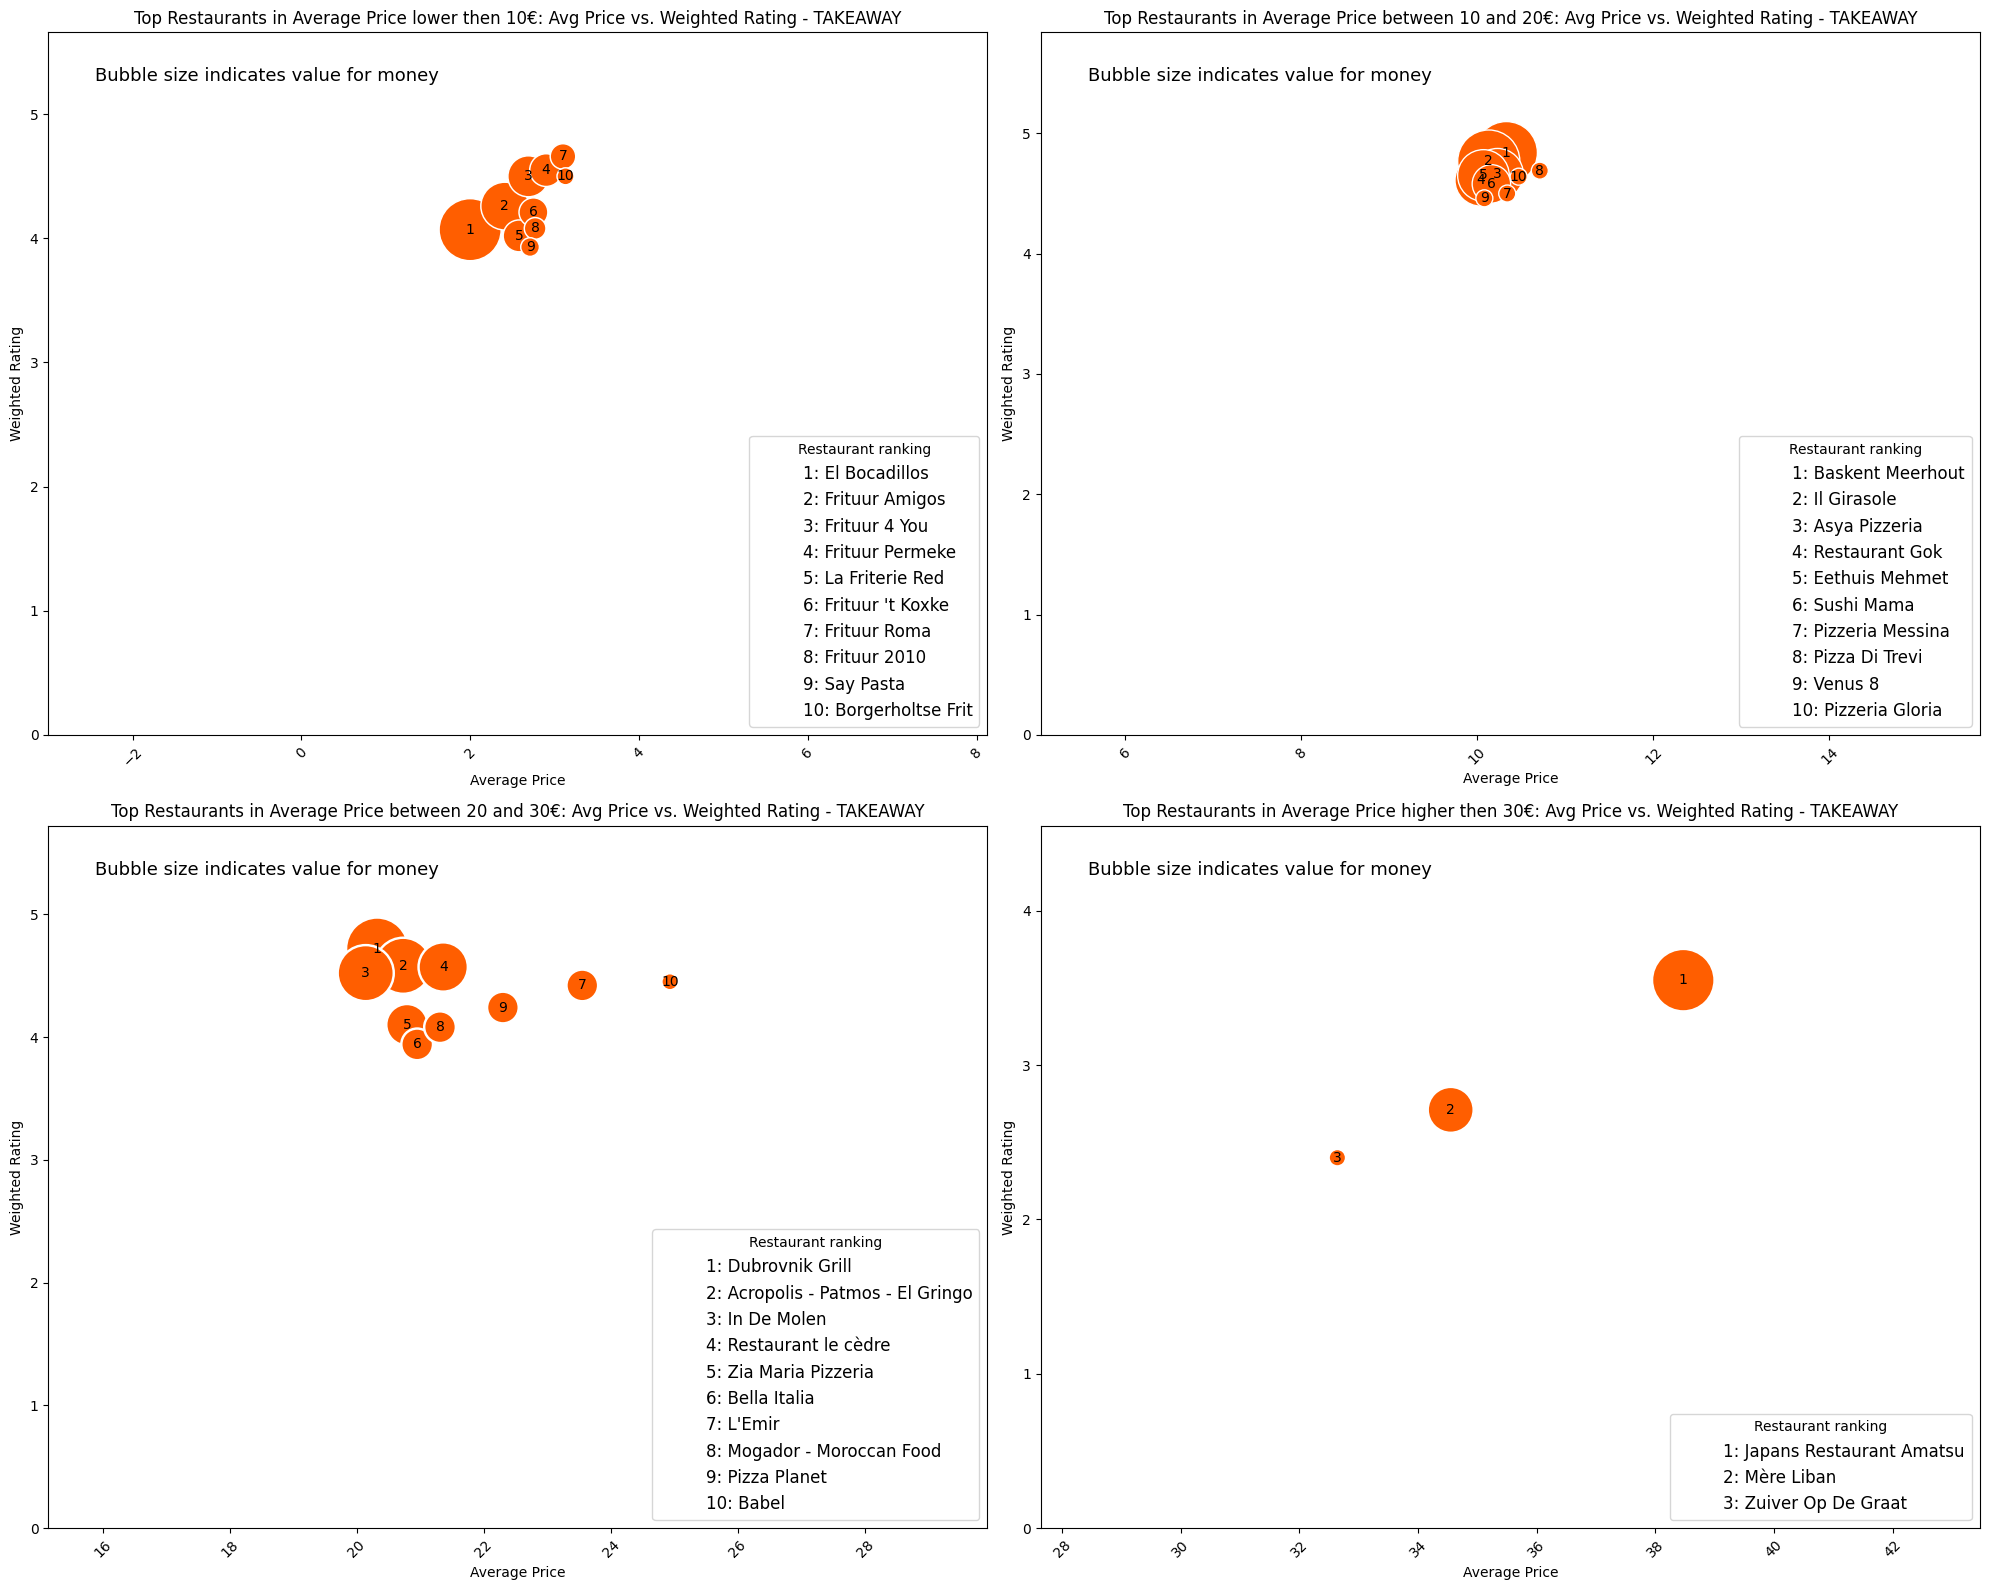

In [753]:
# Get the top 10 restaurants for each bucket
top_10_per_bucket = takeAwy_df.sort_values(by='price_to_weighted_rating_ratio', ascending=False).groupby('price_bucket').head(10)

# Create a custom neon orange color palette
palette = sns.color_palette(["#FF5E00", "#FF6F00", "#FF7D00", "#FF8C00", "#FF9A00"], n_colors=len(top_10_per_bucket['price_bucket'].unique()))

# Set up subplots for four charts
unique_buckets = top_10_per_bucket['price_bucket'].unique()
num_buckets = len(unique_buckets)
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # Adjust size as needed

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each bucket and plot a chart
for i, bucket in enumerate(unique_buckets):
    ax = axes[i]
    bucket_data = top_10_per_bucket[top_10_per_bucket['price_bucket'] == bucket]

    # Plot the scatter plot for each bucket
    sns.scatterplot(
        data=bucket_data,
        x='avg_price',
        y='weighted_rating',
        size='normalized_price_to_weighted_rating_ratio',
        hue='price_bucket',
        sizes=(150, 2000),  # Bubble size range
        palette=palette,
        ax=ax,
        legend=None  # Drop the legend initially
    )

    # Number the bubbles from 1 to 10 and add them as labels
    for j, row in enumerate(bucket_data.iterrows()):
        _, row = row
        ax.text(
            row['avg_price'],
            row['weighted_rating'],
            str(j + 1),  # Number the bubbles starting from 1
            fontsize=10,  # Slightly larger text for better readability
            ha='center',
            va='center',
            color='black'  # Black text for contrast
        )

    # Add a note about bubble size representing review count
    ax.text(
        x=0.05,  # Adjust the x-position as needed
        y=0.95,  # Adjust the y-position as needed
        s='Bubble size indicates value for money',
        color='black',
        fontsize=13,
        ha='left',
        va='top',
        transform=ax.transAxes  # Use axes coordinates for placement
    )

    # Create a custom legend for each subplot
    handles = []
    labels = []
    for j, row in enumerate(bucket_data.iterrows()):
        _, row = row
        # Create a placeholder line for the legend without a colored marker
        handle = plt.Line2D([0], [0], color='black', lw=0, marker=None, markersize=0)
        handles.append(handle)
        labels.append(f"{j + 1}: {row['name']}")  # Label with number and restaurant name

    ax.legend(
        handles=handles, 
        labels=labels, 
        loc='lower right', 
        title=f'Restaurant ranking',
        prop={'size': 12}  # Adjust the size of the legend text
    )

    # Set title and labels for each subplot
    ax.set_title(f'Top Restaurants in {bucket}: Avg Price vs. Weighted Rating - TAKEAWAY')
    ax.set_xlabel('Average Price')
    ax.set_ylabel('Weighted Rating')

    # Rotate tick labels for better visibility
    ax.tick_params(axis='x', labelrotation=45)

    # Adjust axis limits dynamically based on the range of avg_price
    x_min = bucket_data['avg_price'].min() - 5  # Add a buffer to the lower limit
    x_max = bucket_data['avg_price'].max() + 5  # Add a buffer to the upper limit
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, bucket_data['weighted_rating'].max() + 1)  # Adjust y-axis limit for better space

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()




In [754]:

try:
    uberEats_query = """
    SELECT
        ue.restaurants.sanitized_title as title,
        CAST(ROUND(AVG(ue.menu_items.price_float), 2) AS FLOAT) AS avg_price,
        ue.restaurants.rating__rating_value,
        CAST(REPLACE(ue.restaurants.rating__review_count, '+', '') AS INTEGER) AS numeric_review_count,
        CAST(ROUND(
            (ue.restaurants.rating__rating_value * CAST(REPLACE(ue.restaurants.rating__review_count, '+', '') AS INTEGER)) / 
            (CAST(REPLACE(ue.restaurants.rating__review_count, '+', '') AS INTEGER) + 10), 2
        ) AS FLOAT) AS weighted_rating,
        CAST(ROUND(
            ((ue.restaurants.rating__rating_value * CAST(REPLACE(ue.restaurants.rating__review_count, '+', '') AS INTEGER)) / 
            (CAST(REPLACE(ue.restaurants.rating__review_count, '+', '') AS INTEGER) + 10)) / 
            AVG(ue.menu_items.price_float), 2
        ) AS FLOAT) AS price_to_weighted_rating_ratio,
        CASE 
            WHEN AVG(ue.menu_items.price_float) < 10 THEN 'Low'
            WHEN AVG(ue.menu_items.price_float) BETWEEN 10 AND 20 THEN 'Medium'
            WHEN AVG(ue.menu_items.price_float) BETWEEN 20 AND 30 THEN 'High'
            ELSE 'Premium'
        END AS price_bucket
    FROM
        ue.menu_items
    INNER JOIN
        ue.restaurants 
    ON 
        ue.menu_items.restaurant_id = ue.restaurants.id
    WHERE
        CAST(ue.menu_items.price_float AS FLOAT) > 0
        AND ue.menu_items.price_float IS NOT NULL
        AND ue.restaurants.rating__rating_value IS NOT NULL
        AND ue.restaurants.rating__review_count IS NOT NULL
        AND CAST(REPLACE(ue.restaurants.rating__review_count, '+', '') AS INTEGER) > 0
    GROUP BY
        ue.menu_items.restaurant_id, ue.restaurants.title, ue.restaurants.rating__rating_value, ue.restaurants.rating__review_count
    HAVING
        price_to_weighted_rating_ratio IS NOT NULL
        AND avg_price IS NOT NULL
    ORDER BY
        price_to_weighted_rating_ratio DESC;
    """
    
    # Use pd.read_sql() to fetch the data and create a DataFrame
    uberEats_df = pd.read_sql(uberEats_query, conn)
    
    # Display the DataFrame
    print(uberEats_df)

except sqlite3.OperationalError as e:
    print("Error:", e)

except Exception as ex:
    print("An error occurred:", ex)



                                  title  avg_price  rating__rating_value  \
0                  Belchicken - Basilix       2.55                   4.1   
1     Bakkerij Dellafaille - Nieuw Zuid       2.92                   4.8   
2                Frituur Frans Hooiaard       3.29                   4.5   
3                           Fritkot Max       2.86                   4.4   
4             RUBA - Healthy Fresh Food       3.50                   4.6   
...                                 ...        ...                   ...   
1085                     Everest Gurkha      15.48                   3.7   
1086                          Triangolo      17.16                   3.6   
1087               Nachtwinkel Service        8.05                   1.1   
1088                          Krua Thai      16.08                   3.6   
1089                       Night Knight       8.11                   1.1   

      numeric_review_count  weighted_rating  price_to_weighted_rating_ratio  \
0       

In [755]:
uberEats_df.head()

,title,avg_price,rating__rating_value,numeric_review_count,weighted_rating,price_to_weighted_rating_ratio,price_bucket
0,Belchicken - Basilix,2.55,4.1,200,3.90,1.53,Low
1,Bakkerij Dellafaille - Nieuw Zuid,2.92,4.8,84,4.29,1.47,Low
2,Frituur Frans Hooiaard,3.29,4.5,100,4.09,1.24,Low
3,Fritkot Max,2.86,4.4,40,3.52,1.23,Low
4,RUBA - Healthy Fresh Food,3.50,4.6,100,4.18,1.19,Low


In [756]:
# Normalize the price_to_weighted_rating_ratio within each price bucket
uberEats_df['normalized_price_to_weighted_rating_ratio'] = uberEats_df.groupby('price_bucket')['price_to_weighted_rating_ratio'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\549615774.py:21: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\549615774.py:21: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Rik\AppData\Local\Temp\ipykernel_14964\549615774.py:21: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(


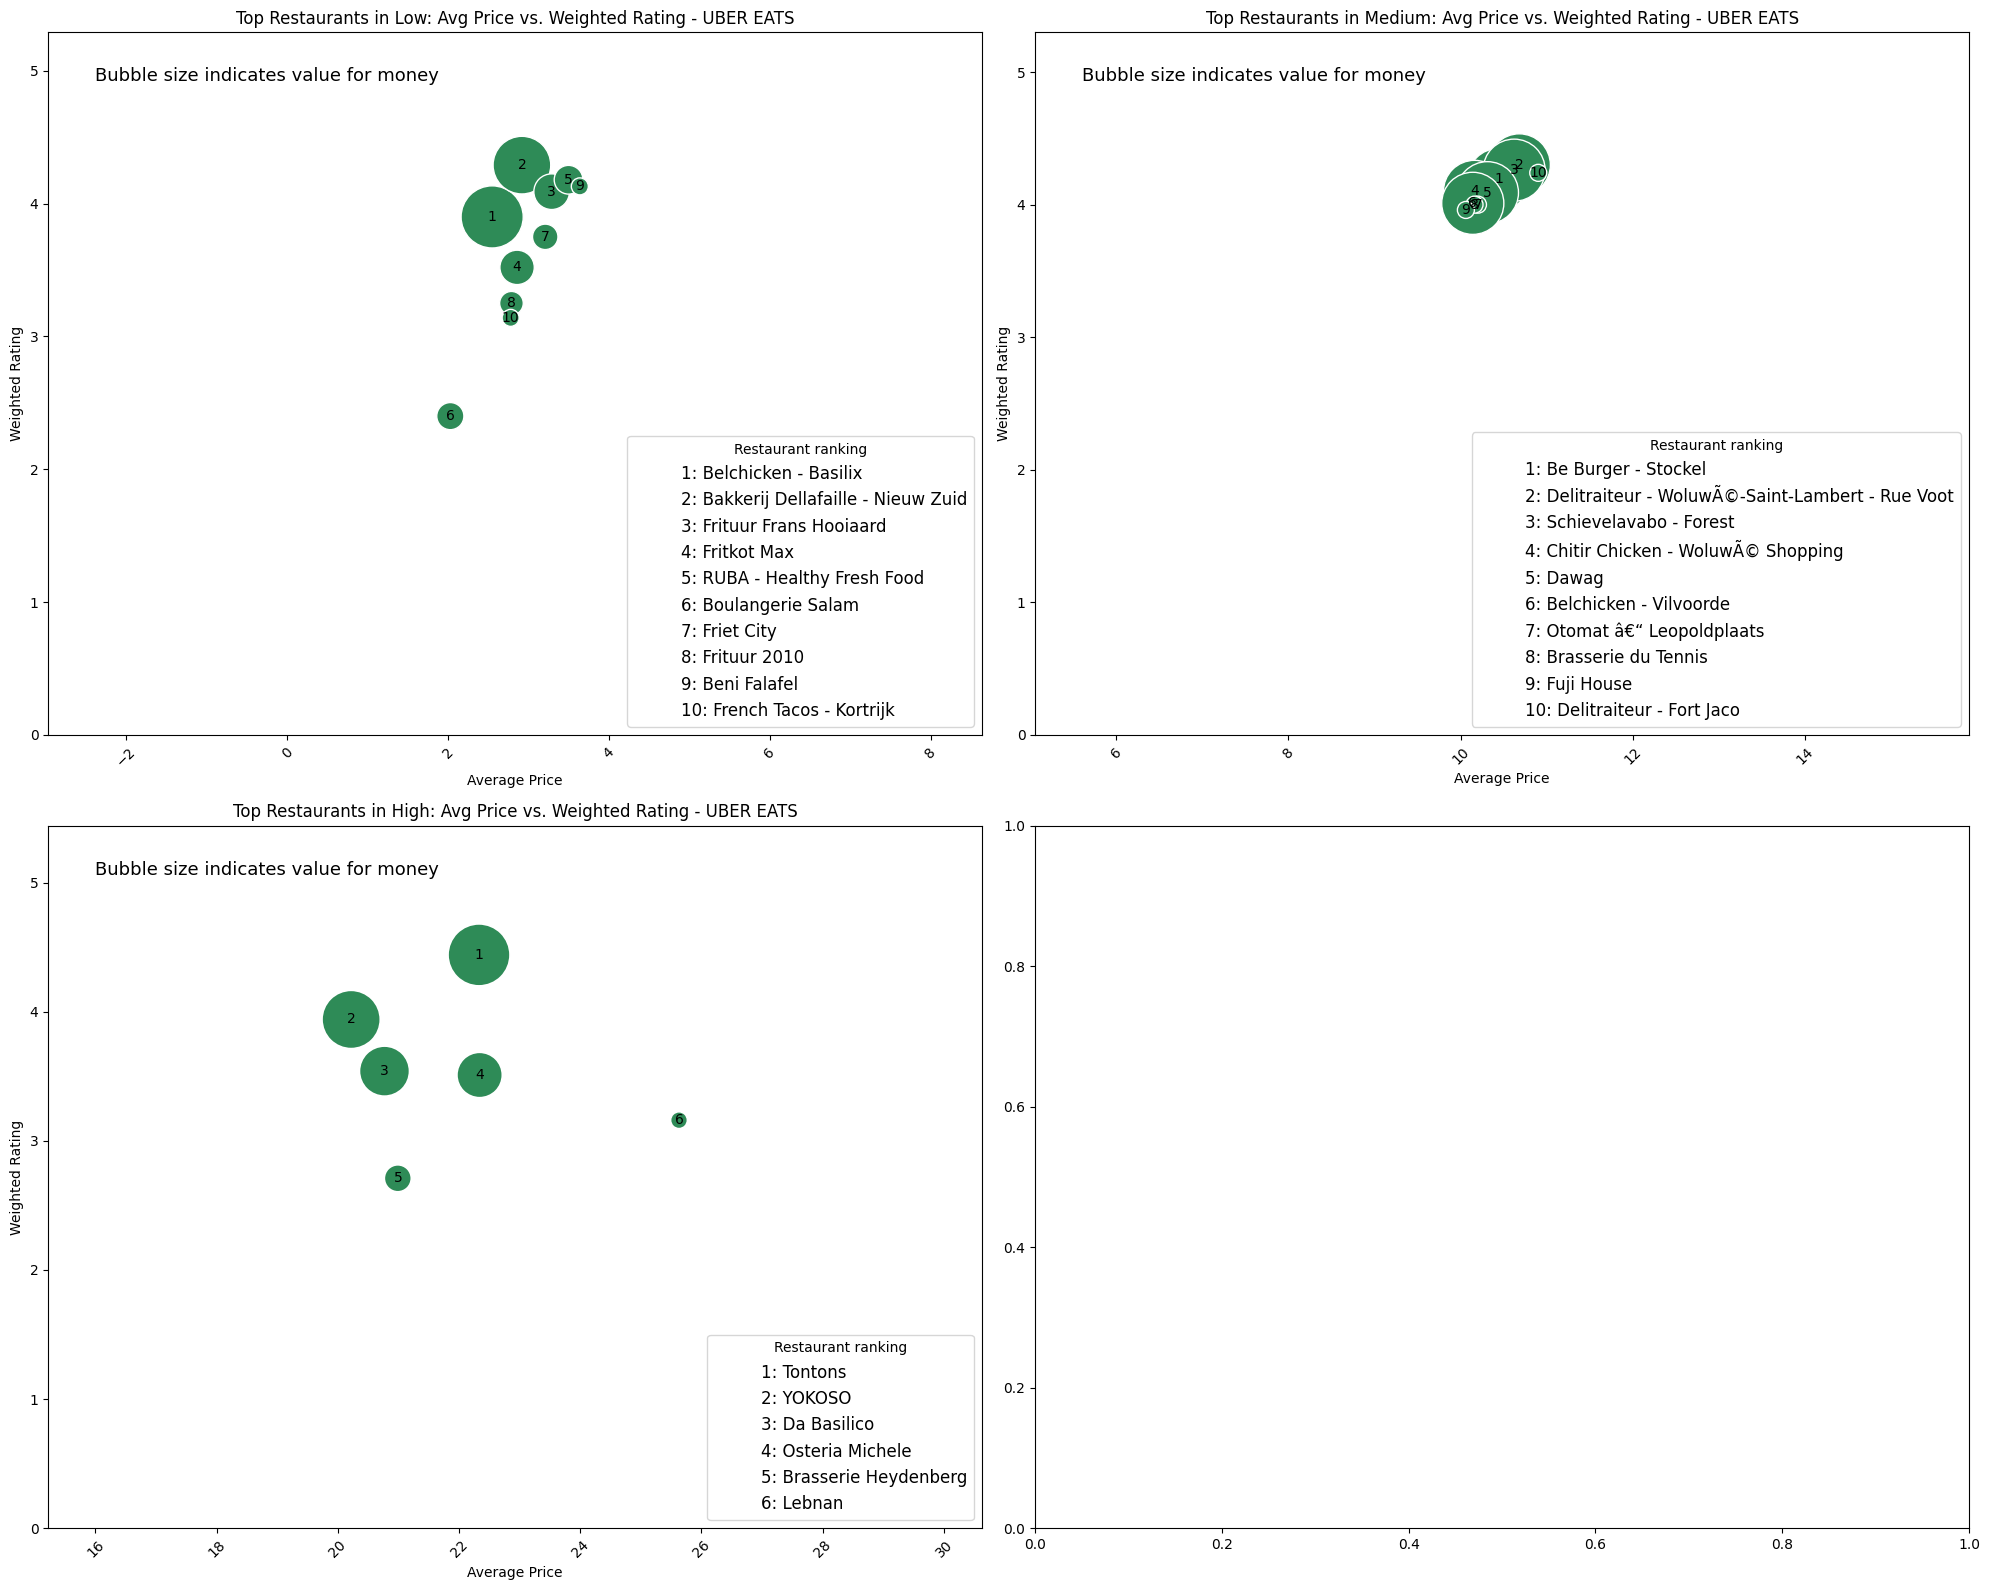

In [757]:
# Get the top 10 restaurants for each bucket
top_10_per_bucket = uberEats_df.sort_values(by='price_to_weighted_rating_ratio', ascending=False).groupby('price_bucket').head(10)

# Create a custom sea green palette
sea_green_palette = sns.color_palette(["#2E8B57", "#3CB371", "#4CAF50", "#66CDAA", "#20B2AA"], n_colors=len(top_10_per_bucket['price_bucket'].unique()))

# Set up subplots for four charts
unique_buckets = top_10_per_bucket['price_bucket'].unique()
num_buckets = len(unique_buckets)
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # Adjust size as needed

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each bucket and plot a chart
for i, bucket in enumerate(unique_buckets):
    ax = axes[i]
    bucket_data = top_10_per_bucket[top_10_per_bucket['price_bucket'] == bucket]

    # Plot the scatter plot for each bucket
    sns.scatterplot(
        data=bucket_data,
        x='avg_price',
        y='weighted_rating',
        size='normalized_price_to_weighted_rating_ratio',
        hue='price_bucket',
        sizes=(150, 2000),  # Bubble size range
        palette=sea_green_palette,
        ax=ax,
        legend=None  # Drop the legend initially
    )

    # Number the bubbles from 1 to 10 and add them as labels
    for j, row in enumerate(bucket_data.iterrows()):
        _, row = row
        ax.text(
            row['avg_price'],
            row['weighted_rating'],
            str(j + 1),  # Number the bubbles starting from 1
            fontsize=10,  # Slightly larger text for better readability
            ha='center',
            va='center',
            color='black'  # Black text for contrast
        )

    # Add a note about bubble size representing review count
    ax.text(
        x=0.05,  # Adjust the x-position as needed
        y=0.95,  # Adjust the y-position as needed
        s='Bubble size indicates value for money',
        color='black',
        fontsize=13,
        ha='left',
        va='top',
        transform=ax.transAxes  # Use axes coordinates for placement
    )

    # Create a custom legend for each subplot
    handles = []
    labels = []
    for j, row in enumerate(bucket_data.iterrows()):
        _, row = row
        # Create a placeholder line for the legend without a colored marker
        handle = plt.Line2D([0], [0], color='black', lw=0, marker=None, markersize=0)
        handles.append(handle)
        labels.append(f"{j + 1}: {row['title']}")  # Label with number and restaurant name

    ax.legend(
        handles=handles, 
        labels=labels, 
        loc='lower right',  # Move the legend to the bottom right
        title=f'Restaurant ranking',
        prop={'size': 12}  # Adjust the size of the legend text
    )

    # Set title and labels for each subplot
    ax.set_title(f'Top Restaurants in {bucket}: Avg Price vs. Weighted Rating - UBER EATS')
    ax.set_xlabel('Average Price')
    ax.set_ylabel('Weighted Rating')

    # Rotate tick labels for better visibility
    ax.tick_params(axis='x', labelrotation=45)

    # Adjust axis limits dynamically based on the range of avg_price
    x_min = bucket_data['avg_price'].min() - 5  # Add a buffer to the lower limit
    x_max = bucket_data['avg_price'].max() + 5  # Add a buffer to the upper limit
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, bucket_data['weighted_rating'].max() + 1)  # Adjust y-axis limit for better space

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

